In [1]:
from bs4 import BeautifulSoup
from  urllib.request import urlopen
import pandas as pd
import numpy as np

In [2]:
year_range=np.arange(2004,2019)
df=pd.DataFrame(columns=np.arange(30))

In [3]:
df=pd.DataFrame(columns=np.arange(30))
num=1
for i in range(2004,2019):
    html=urlopen('https://www.basketball-reference.com/players/j/jamesle01/gamelog/{}'.format(i)).read()
    soup=BeautifulSoup(html,features='html.parser')
    for number in range(1144):
        text=soup.find('tr',{'id':'pgl_basic.{}'.format(num)})
        data=[]
        if text !=None:
            for context in text:
                data.append(context.get_text())
            num+=1
        else:
            break
        df=df.append(pd.DataFrame(np.array(data).reshape(1,-1)))
    print(i)

2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [4]:
df1=df.copy()
pd.set_option('display.max_columns',None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:00,12,20,.600,0,2,.000,1,3,.333,2,4,6,9,4,0,2,3,25,24.7,-9
0,2,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,41:00,8,17,.471,1,5,.200,4,7,.571,2,10,12,8,1,0,7,1,21,14.7,-3
0,3,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:00,3,12,.250,0,1,.000,2,2,1.000,0,4,4,6,2,0,2,3,8,5.0,-21
0,4,4,2003-11-05,18-310,CLE,,DEN,L (-4),1,41:00,3,11,.273,0,2,.000,1,1,1.000,2,9,11,7,2,3,2,1,7,11.2,-3
0,5,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,44:00,8,18,.444,1,2,.500,6,7,.857,0,5,5,3,0,0,7,2,23,9.0,-7


In [5]:
df.to_csv('Formedium.csv')

 1. Rk : Rank
2. G : Season Game
3. Date : Game Day
4. Age : Age of Player at the start of February 1st of that season
5. Tm : Team
6. home/court : home(play in home)
7. Opp : Opponent
8. win|loss : win or loss (win score or win loss)
9. GS : Game Started
10. MP : Minutes Played
11. FG : Field Goals
12. FGA : Field Goals Attempts
13. FG% : Field Goals Percentage
14. 3P : 3-Point Field Goals
15. 3PA -- 3-Point Field Goal Attempts
16. 3P% -- 3-Point Field Goal Percentage
17. FT -- Free Throws
18. FTA -- Free Throw Attempts
19. FT% -- Free Throw Percentage
20. ORB -- Offensive Rebounds
21. DRB -- Defensive Rebounds
22. TRB -- Total Rebounds
23. AST -- Assists
24. STL -- Steals
25. BLK -- Blocks
26. TOV -- Turnovers
27. PF -- Personal Fouls
28. PTS -- Points
29. GmSc -- Game Score
30. +/- -- Plus/Minus

In [6]:
df1=pd.read_csv('Formedium.csv',index_col=0)
df1.columns=['場次','季賽場次','比賽時間','年紀','所在隊伍','主客場','對手','贏(幾分)','是否先發','上場時間','二分球命中數','二分球投球數',
                   '二分球命中率','三分球命中數','三分球投球數','三分球命中率','罰球命中數','罰球投球數','罰球命中率','進攻籃板','防守籃板','全部籃板',
                    '助攻','抄截','火鍋','失誤','犯規','得分','Game Score(貢獻值)','正負值']

In [7]:
df1.head()

,場次,季賽場次,比賽時間,年紀,所在隊伍,主客場,對手,贏(幾分),是否先發,上場時間,二分球命中數,二分球投球數,二分球命中率,三分球命中數,三分球投球數,三分球命中率,罰球命中數,罰球投球數,罰球命中率,進攻籃板,防守籃板,全部籃板,助攻,抄截,火鍋,失誤,犯規,得分,Game Score(貢獻值),正負值
0,1,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:00,12,20,0.600,0,2,0.0,1,3,0.333,2,4,6,9,4,0,2,3,25,24.7,-9
0,2,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,41:00,8,17,0.471,1,5,0.2,4,7,0.571,2,10,12,8,1,0,7,1,21,14.7,-3
0,3,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:00,3,12,0.250,0,1,0.0,2,2,1.000,0,4,4,6,2,0,2,3,8,5.0,-21
0,4,4,2003-11-05,18-310,CLE,NaN,DEN,L (-4),1,41:00,3,11,0.273,0,2,0.0,1,1,1.000,2,9,11,7,2,3,2,1,7,11.2,-3
0,5,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,44:00,8,18,0.444,1,2,0.5,6,7,0.857,0,5,5,3,0,0,7,2,23,9.0,-7


In [8]:
df1['比賽時間']=pd.to_datetime(df1['比賽時間'])

In [9]:
df1['主客場']=df1['主客場'].replace({np.nan:0,'@':1})
df1['勝分']=df1['贏(幾分)'].str.slice(3,-1)
df1['輸贏']=df1['贏(幾分)'].str.slice(0,1)
df1.drop('贏(幾分)',axis=1,inplace=True)
df1.head()

,場次,季賽場次,比賽時間,年紀,所在隊伍,主客場,對手,是否先發,上場時間,二分球命中數,二分球投球數,二分球命中率,三分球命中數,三分球投球數,三分球命中率,罰球命中數,罰球投球數,罰球命中率,進攻籃板,防守籃板,全部籃板,助攻,抄截,火鍋,失誤,犯規,得分,Game Score(貢獻值),正負值,勝分,輸贏
0,1,1,2003-10-29,18-303,CLE,1,SAC,1,42:00,12,20,0.600,0,2,0.0,1,3,0.333,2,4,6,9,4,0,2,3,25,24.7,-9,-14,L
0,2,2,2003-10-30,18-304,CLE,1,PHO,1,41:00,8,17,0.471,1,5,0.2,4,7,0.571,2,10,12,8,1,0,7,1,21,14.7,-3,-9,L
0,3,3,2003-11-01,18-306,CLE,1,POR,1,39:00,3,12,0.250,0,1,0.0,2,2,1.000,0,4,4,6,2,0,2,3,8,5.0,-21,-19,L
0,4,4,2003-11-05,18-310,CLE,0,DEN,1,41:00,3,11,0.273,0,2,0.0,1,1,1.000,2,9,11,7,2,3,2,1,7,11.2,-3,-4,L
0,5,5,2003-11-07,18-312,CLE,1,IND,1,44:00,8,18,0.444,1,2,0.5,6,7,0.857,0,5,5,3,0,0,7,2,23,9.0,-7,-1,L


In [10]:
df1['比賽時間']=pd.to_datetime(df1['比賽時間'])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 0
Data columns (total 31 columns):
場次                 1143 non-null int64
季賽場次               1143 non-null int64
比賽時間               1143 non-null datetime64[ns]
年紀                 1143 non-null object
所在隊伍               1143 non-null object
主客場                1143 non-null int64
對手                 1143 non-null object
是否先發               1143 non-null int64
上場時間               1143 non-null object
二分球命中數             1143 non-null int64
二分球投球數             1143 non-null int64
二分球命中率             1143 non-null float64
三分球命中數             1143 non-null int64
三分球投球數             1143 non-null int64
三分球命中率             1103 non-null float64
罰球命中數              1143 non-null int64
罰球投球數              1143 non-null int64
罰球命中率              1131 non-null float64
進攻籃板               1143 non-null int64
防守籃板               1143 non-null int64
全部籃板               1143 non-null int64
助攻                 1143 non-null int64
抄截                 

In [12]:
import matplotlib.pyplot as plt
#首先我會透過得分來將其分為10個區間 此處會用到p代表著此直方圖 bins代表將hist分為幾個區間 patch會返回裡面包含的數據
p,bins,patch=plt.hist(df1['得分'],bins=10,color='lightblue')
'''
因為要在圖上不同的bins區間標注文字,必須將其pd.cut隔成10個區間,但這裡的cut和hist有點不一樣,hist的bins曲的範圍是<X(不會包括X),
而pd.cut則為<=X(會包含X),所以我在後面-0.1,使pd.cut保持取在0.9的位置
'''
scores_area=pd.cut(df1['得分'],bins=bins-0.1).value_counts().sort_index()
for i in range(len(scores_area)):
    plt.text(x=bins[[i,i+1]].mean()-1,y=scores_area.values[i],s='{}'.format(scores_area.values[i]))
plt.ylabel('Game')
plt.xlabel('PTS')
plt.title('King James')
plt.savefig('Lebron得分分佈.jpg')

In [13]:
data_stat=df1['得分'].describe()
data_stat=pd.DataFrame(data_stat,columns=['得分']).T
data_stat['骰子指數']=(pd.DataFrame(data_stat['std']/data_stat['mean'],columns=['PTS']))
data_stat.columns=['場次','平均','標準差','最小值','第1分位數','第2分位數','第3分位數','最大值','骰子指數']
data_stat.index=['得分']
data_stat

,場次,平均,標準差,最小值,第1分位數,第2分位數,第3分位數,最大值,骰子指數
得分,1143.0,27.154856,7.911042,3.0,22.0,27.0,32.0,61.0,0.291331


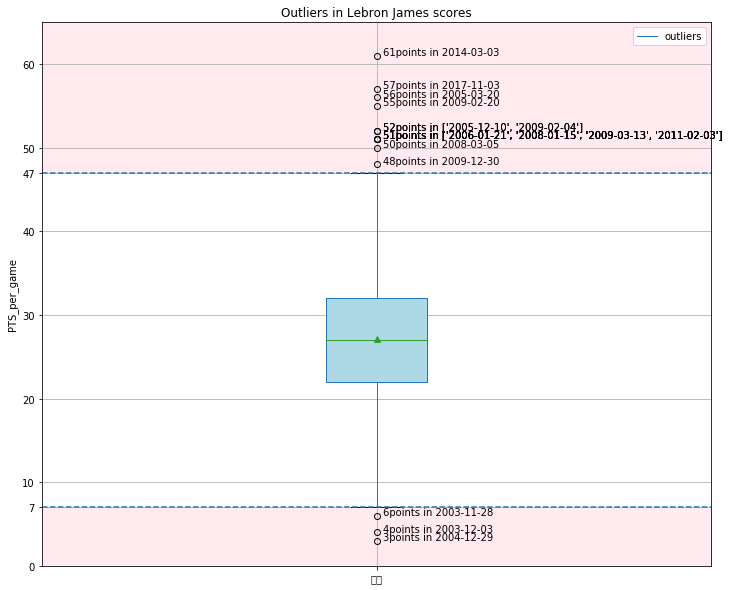

In [14]:
#將date轉成index放在最左邊來表示
df1_date=df1.set_index('比賽時間').copy()
plt.figure(figsize=(12,10))
p=df1_date[['得分']].boxplot(return_type='dict',showcaps=True,showmeans=True,patch_artist=True)
#找到得分裡的outliers 並取得x,y軸的位置
x=p['fliers'][0].get_xdata()
y=p['fliers'][0].get_ydata()
a=[]
for i in range(len(x)):
#建立符合超過outliers得分的y點
    date=df1_date[df1_date['得分']==y[i]].index.astype(str)
    if len(date)>1:
#利用plt.annotate這個函式 在圖上標記想要的文字或可以用箭頭標示
        plt.annotate('{0}points in {1}'.format(y[i],list(date)),xy=(x[i],y[i]),xytext=(x[i]+0.01,y[i]+0.1))
    else:
        plt.annotate('{0}points in {1}'.format(y[i],str(date[0])),xy=(x[i],y[i]),xytext=(x[i]+0.01,y[i]+0.1))
#為boxes(為Q3,Q1之間的盒子)上色
p['boxes'][0].set_facecolor('lightblue')
plt.ylabel('PTS_per_game')
plt.ylim(0,65)
#畫線在outliers分隔線上做明顯的註記
plt.axhline(y=p['caps'][1].get_ydata()[0],linestyle='--')
plt.axhline(y=p['caps'][0].get_ydata()[0],linestyle='--')
plt.yticks((0,7,10,20,30,40,47,50,60))
#上色在outliers區域
plt.fill_between(x=plt.xlim(),y1=47,y2=47+18,alpha=0.3,color='pink')
plt.fill_between(x=plt.xlim(),y1=7,alpha=0.3,color='pink')
plt.title('Outliers in Lebron James scores')
plt.legend(['outliers'])
plt.show()

In [15]:
normal_boom=df1[(df1['得分']>=32) & (df1['得分']<=47)]['得分'].count()/df1.shape[0]
normal_shit=df1[(df1['得分']<=22) & (df1['得分']>=7)]['得分'].count()/df1.shape[0]
extreme_boom=df1[(df1['得分']>47)]['得分'].count()/df1.shape[0]
extreme_shit=df1[(df1['得分']<7)]['得分'].count()/df1.shape[0]

df_2017=df1_date[df1_date.index>'2017-07']
boom2017_rate=df_2017[(df_2017['得分']>=32) & (df_2017['得分']<=47)]['得分'].count()/df1[(df1['得分']>=32) & (df1['得分']<=47)]['得分'].count()
boom2017_rate=df_2017[(df_2017['得分']>=32) & (df_2017['得分']<=47)]['得分'].count()/df1[(df1['得分']>=32) & (df1['得分']<=47)]['得分'].count()
shit2017_rate=df_2017[(df_2017['得分']<=22) & (df_2017['得分']>=7)]['得分'].count()/df1[(df1['得分']<=22) & (df1['得分']>=7)]['得分'].count()
extreme_boom2017_rate=df_2017[df_2017['得分']>47]['得分'].count()/df1[df1['得分']>47]['得分'].count()
extreme_shit2017_rate=df_2017[(df_2017['得分']<7)]['得分'].count()/ df1[df1['得分']<7]['得分'].count()

extreme_boom2017_game_rate=df_2017[df_2017['得分']>47]['得分'].count()/df_2017.shape[0]
extreme_shit2017_game_rate=df_2017[df_2017['得分']<7]['得分'].count()/df_2017.shape[0]
boom2017_game_rate=df_2017[(df_2017['得分']>=32) & (df_2017['得分']<=47)]['得分'].count()/df_2017.shape[0]
shit2017_game_rate=df_2017[(df_2017['得分']<=22) & (df_2017['得分']>=7)]['得分'].count()/df_2017.shape[0]
df_data=pd.DataFrame({'普通爆擊率':[normal_boom,boom2017_game_rate,boom2017_rate],
                      '極端爆擊率':[extreme_boom,extreme_boom2017_game_rate,extreme_boom2017_rate],
                       '普通烙賽率':[normal_shit,shit2017_game_rate,shit2017_rate],
                     '極端烙賽率':[extreme_shit,extreme_shit2017_game_rate,extreme_shit2017_rate]},index=['生涯(15個賽季)','2017賽季','2017賽季佔生涯比重'])
df_data.round(3)

,普通爆擊率,極端爆擊率,普通烙賽率,極端烙賽率
生涯(15個賽季),0.281,0.010,0.277,0.003
2017賽季,0.293,0.012,0.244,0.000
2017賽季佔生涯比重,0.075,0.083,0.063,0.000


In [16]:
df_2017=df1_date[df1_date.index>'2017-07']

Text(0.5,1,'Dice')

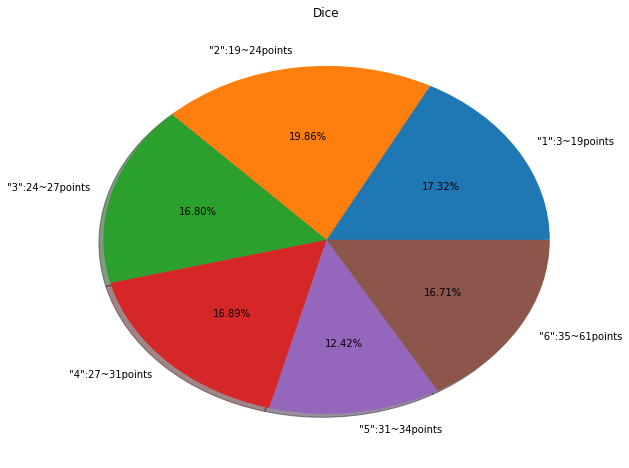

In [17]:
labels=['"1":3~19points','"2":19~24points','"3":24~27points','"4":27~31points','"5":31~34points','"6":35~61points']
dice=pd.qcut(df1['得分'],q=6,labels=labels).value_counts().sort_index()/df1.shape[0]
plt.figure(figsize=(10,8))
plt.pie(dice,autopct='%1.2f%%',labels=labels,shadow=True)
plt.title('Dice')